In [1]:

import googleapiclient.discovery
from googleapiclient.discovery import build
from IPython.display import JSON
import pandas as pd
import datetime
import isodate
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
from dateutil import parser

 


In [2]:
API = "MY API key"

In [3]:
CHANNEL_ID = ['UC3w193M5tYPJqF0Hi-7U-2g']

In [4]:
api_service_name = "youtube"
api_version = "v3"
#get credentials and create an API
youtube = build(
        api_service_name, api_version, developerKey=API)

In [5]:
def get_channel(youtube,CHANNEL_ID):

    all_data =[]

    request = youtube.channels().list(
            part="snippet,contentDetails,statistics",
            id=','.join(CHANNEL_ID)
        )
    response = request.execute()
    JSON(response)
    for item in response['items']:
        data={' ChannelName':item['snippet']['title'],
              'Subscribers':item['statistics']['subscriberCount'],
              'Views':item['statistics']['viewCount'],
              'TotalVideos':item['statistics']['videoCount'],
              'PlaylistId':item['contentDetails']['relatedPlaylists']['uploads']}
        all_data.append(data)
    return(pd.DataFrame(all_data))

playlist_id ="UU3w193M5tYPJqF0Hi-7U-2g"
def get_video_ids(youtube, playlist_id):
    
    video_ids = []
    
    request = youtube.playlistItems().list(
        part="snippet,contentDetails",
        playlistId=playlist_id,
        maxResults = 50
    )
    response = request.execute()
    
    for item in response['items']:
        video_ids.append(item['contentDetails']['videoId'])
        
    next_page_token = response.get('nextPageToken')
    while next_page_token is not None:
        request = youtube.playlistItems().list(
                    part='contentDetails',
                    playlistId = playlist_id,
                    maxResults = 50,
                    pageToken = next_page_token)
        response = request.execute()

        for item in response['items']:
            video_ids.append(item['contentDetails']['videoId'])

        next_page_token = response.get('nextPageToken')
        
    return video_ids

def get_video_details(youtube, video_ids):

    all_video_info = []
    
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
            part="snippet,contentDetails,statistics",
            id=','.join(video_ids[i:i+50])
        )
        response = request.execute() 

        for video in response['items']:
            data = {'snippet': ['channelTitle', 'title', 'description', 'tags', 'publishedAt'],
                             'statistics': ['viewCount', 'likeCount', 'favouriteCount', 'commentCount'],
                             'contentDetails': ['duration', 'definition', 'caption']
                            }
            video_info = {}
            video_info['video_id'] = video['id']
            for b in data.keys():
                                           
                for a in data[b]:
                    try:
                        video_info[a] = video[b][a]
                    except:
                        video_info[a] = None

            all_video_info.append(video_info)
    
    return pd.DataFrame(all_video_info)
STAT = get_channel(youtube,CHANNEL_ID)



HttpError: <HttpError 400 when requesting https://youtube.googleapis.com/youtube/v3/channels?part=snippet%2CcontentDetails%2Cstatistics&id=UC3w193M5tYPJqF0Hi-7U-2g&key=MY+API+key&alt=json returned "API key not valid. Please pass a valid API key.". Details: "[{'message': 'API key not valid. Please pass a valid API key.', 'domain': 'global', 'reason': 'badRequest'}]">

In [ ]:
STAT

,ChannelName,Subscribers,Views,TotalVideos,PlaylistId
0,Dr. Eric Berg DC,10100000,1893445448,4834,UU3w193M5tYPJqF0Hi-7U-2g


In [ ]:

video_ids = get_video_ids(youtube,playlist_id)


In [ ]:
df= get_video_details(youtube,video_ids)
df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
0,6c8K338nV84,Dr. Eric Berg DC,"The Dr. Berg Show LIVE - April 14, 2023",To find the Dr. Berg App - search on your phon...,None,2023-04-11T00:03:31Z,0,13,None,0,P0D,sd,false
1,2fR5nVsGlk0,Dr. Eric Berg DC,Protein Is Not a Protein,Let me clear something up. A protein is not re...,"[protein is not protein, protein, protein sour...",2023-04-10T10:00:03Z,159423,7592,None,663,PT9M17S,hd,false
2,jIvFURdGEVE,Dr. Eric Berg DC,The Amazing Properties of Wormwood,Learn more about the benefits of wormwood and ...,"[amazing properties of wormwood, wormwood, wor...",2023-04-09T10:00:34Z,160346,8151,None,829,PT6M7S,hd,false
3,IcBuLMNnpZs,Dr. Eric Berg DC,Do THIS for Genetic Breast Cancer (BRCA-1),Learn more about breast cancer and how to decr...,"[genetic breast cancer, breast cancer, cancer,...",2023-04-08T10:00:10Z,65528,3593,None,359,PT8M30S,hd,false
4,kY1Uk1OgJws,Dr. Eric Berg DC,"The Dr. Berg Show LIVE - April 7, 2023",To find the Dr. Berg App - search on your phon...,None,2023-04-07T16:08:40Z,56265,2224,None,211,PT1H1M39S,hd,false
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4831,McGFltMvSIo,Dr. Eric Berg DC,Vitamins and Nutrients for Weight Loss,Talk to a Dr. Berg Keto Consultant today and g...,"[Vitamins, Best Vitamins for Weight Loss, Vita...",2009-02-19T00:05:43Z,18566,476,None,30,PT5M10S,hd,false
4832,Q5wN32_3m4o,Dr. Eric Berg DC,"Adrenal, Stress and Your Sleep",Talk to a Dr. Berg Keto Consultant today and g...,"[Stress, Adrenal, Sleep, Adrenal Stress Respon...",2009-02-17T02:02:46Z,54374,1484,None,15,PT8M47S,hd,false
4833,lgyf5KoRfzE,Dr. Eric Berg DC,Exercise,Talk to a Dr. Berg Keto Consultant today and g...,"[Exercise, Lose Belly Fat, Lose Weight Fast at...",2009-02-17T00:40:53Z,52949,1479,None,15,PT8M57S,hd,false
4834,XO-iyh2Z_s8,Dr. Eric Berg DC,Body Types,Talk to a Dr. Berg Keto Consultant today and g...,"[BodyTypes1, body type diet, Women, Men, Body ...",2009-02-17T00:37:36Z,56632,None,None,25,PT9M1S,hd,false


# Data pre-processing

In [ ]:
df.isna().any()

video_id          False
channelTitle      False
title             False
description       False
tags               True
publishedAt       False
viewCount          True
likeCount          True
favouriteCount     True
commentCount       True
duration          False
definition        False
caption           False
dtype: bool

In [ ]:
df.shape

(4836, 13)

In [ ]:
df.dtypes

video_id          object
channelTitle      object
title             object
description       object
tags              object
publishedAt       object
viewCount         object
likeCount         object
favouriteCount    object
commentCount      object
duration          object
definition        object
caption           object
dtype: object

In [ ]:
numeric_col = ['viewCount','likeCount','commentCount','favouriteCount']
df[numeric_col]= df[numeric_col].apply(pd.to_numeric, errors = 'coerce', axis=1)

In [ ]:
df['publishedAt'] = df['publishedAt'].apply(lambda x: parser.parse(x)) 
df['pushblishDayName'] = df['publishedAt'].apply(lambda x: x.strftime("%A")) 

In [ ]:
df.publishedAt = pd.to_datetime(df.publishedAt)


In [ ]:
# convert duration to seconds
df['durationSec'] =df['duration'].apply(lambda x: isodate.parse_duration(x))
df['durationSec'] =df['durationSec'].astype('timedelta64[s]')

In [ ]:
df['tagCount'] = df['tags'].apply(lambda x: 0 if x is  None else len(x))

# Best performing video

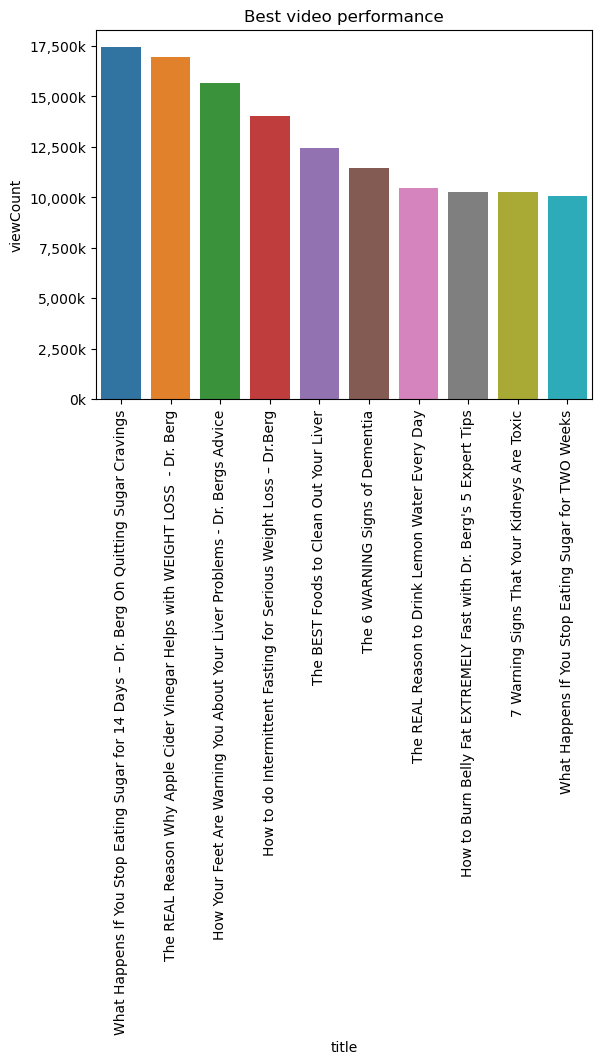

In [ ]:
ax= sns.barplot(x= 'title', y='viewCount',data=df.sort_values('viewCount',ascending=False)[0:10])
plt.title('Best video performance')
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation =90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'k'))



# Worst performing video

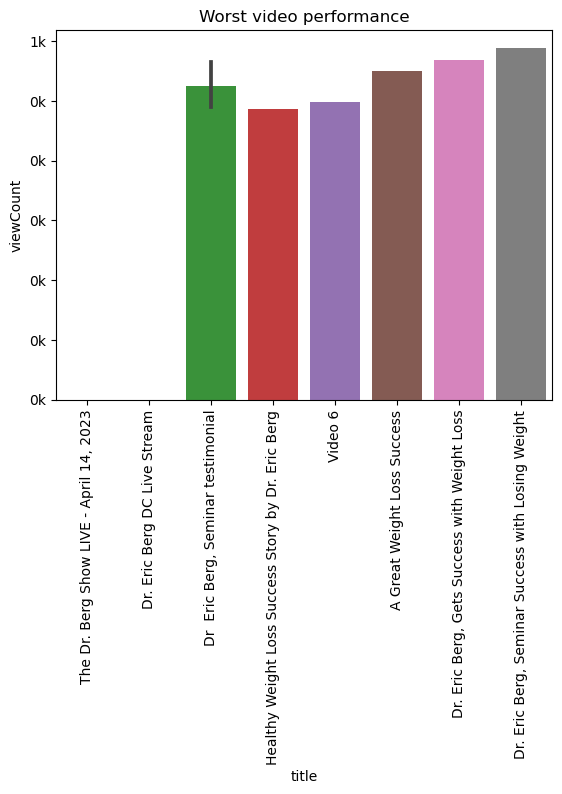

In [ ]:
ax= sns.barplot(x= 'title', y='viewCount',data=df.sort_values('viewCount',ascending=True)[0:10])
plt.title('Worst video performance')
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation =90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'k'))

# View distribution per video

<AxesSubplot:>

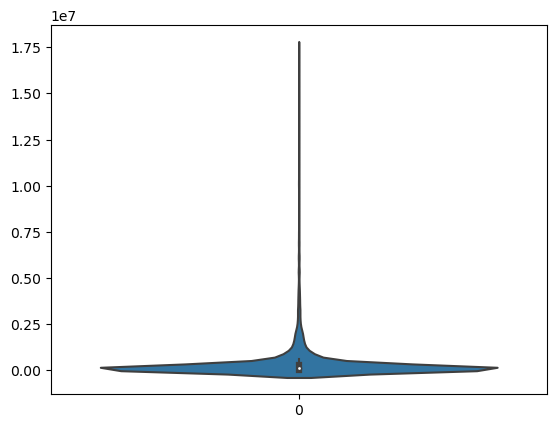

In [ ]:
sns.violinplot(df['viewCount'])

# View vs Like & Comment 

<AxesSubplot:xlabel='likeCount', ylabel='viewCount'>

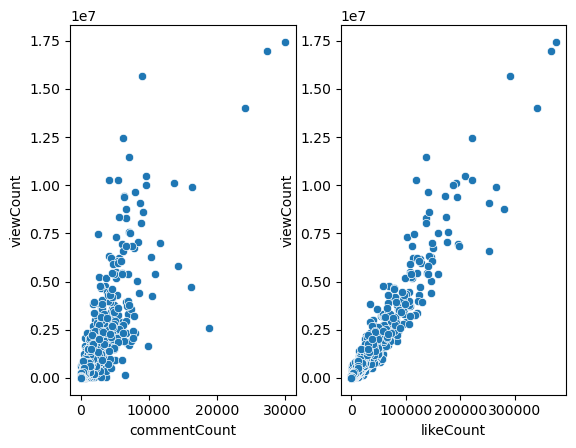

In [ ]:
fig, ax = plt.subplots(1,2)
sns.scatterplot(data = df, x= 'commentCount', y= 'viewCount',ax = ax[0])
sns.scatterplot(data = df, x= 'likeCount', y= 'viewCount',ax = ax[1])

We can see some positive correlation here. specially for the number of LIKEs. it make sense, the more people who watch the videos the more LIKEs the video could potentially  get.

# Each video duration

<AxesSubplot:xlabel='durationSec', ylabel='Count'>

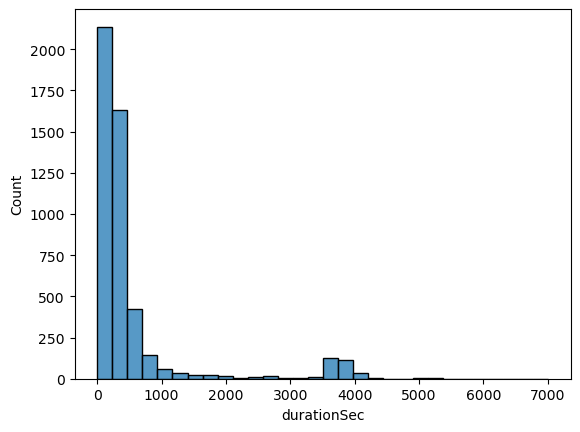

In [ ]:
sns.histplot(data=df, x='durationSec',bins= 30)

# Wordcloud for video titles

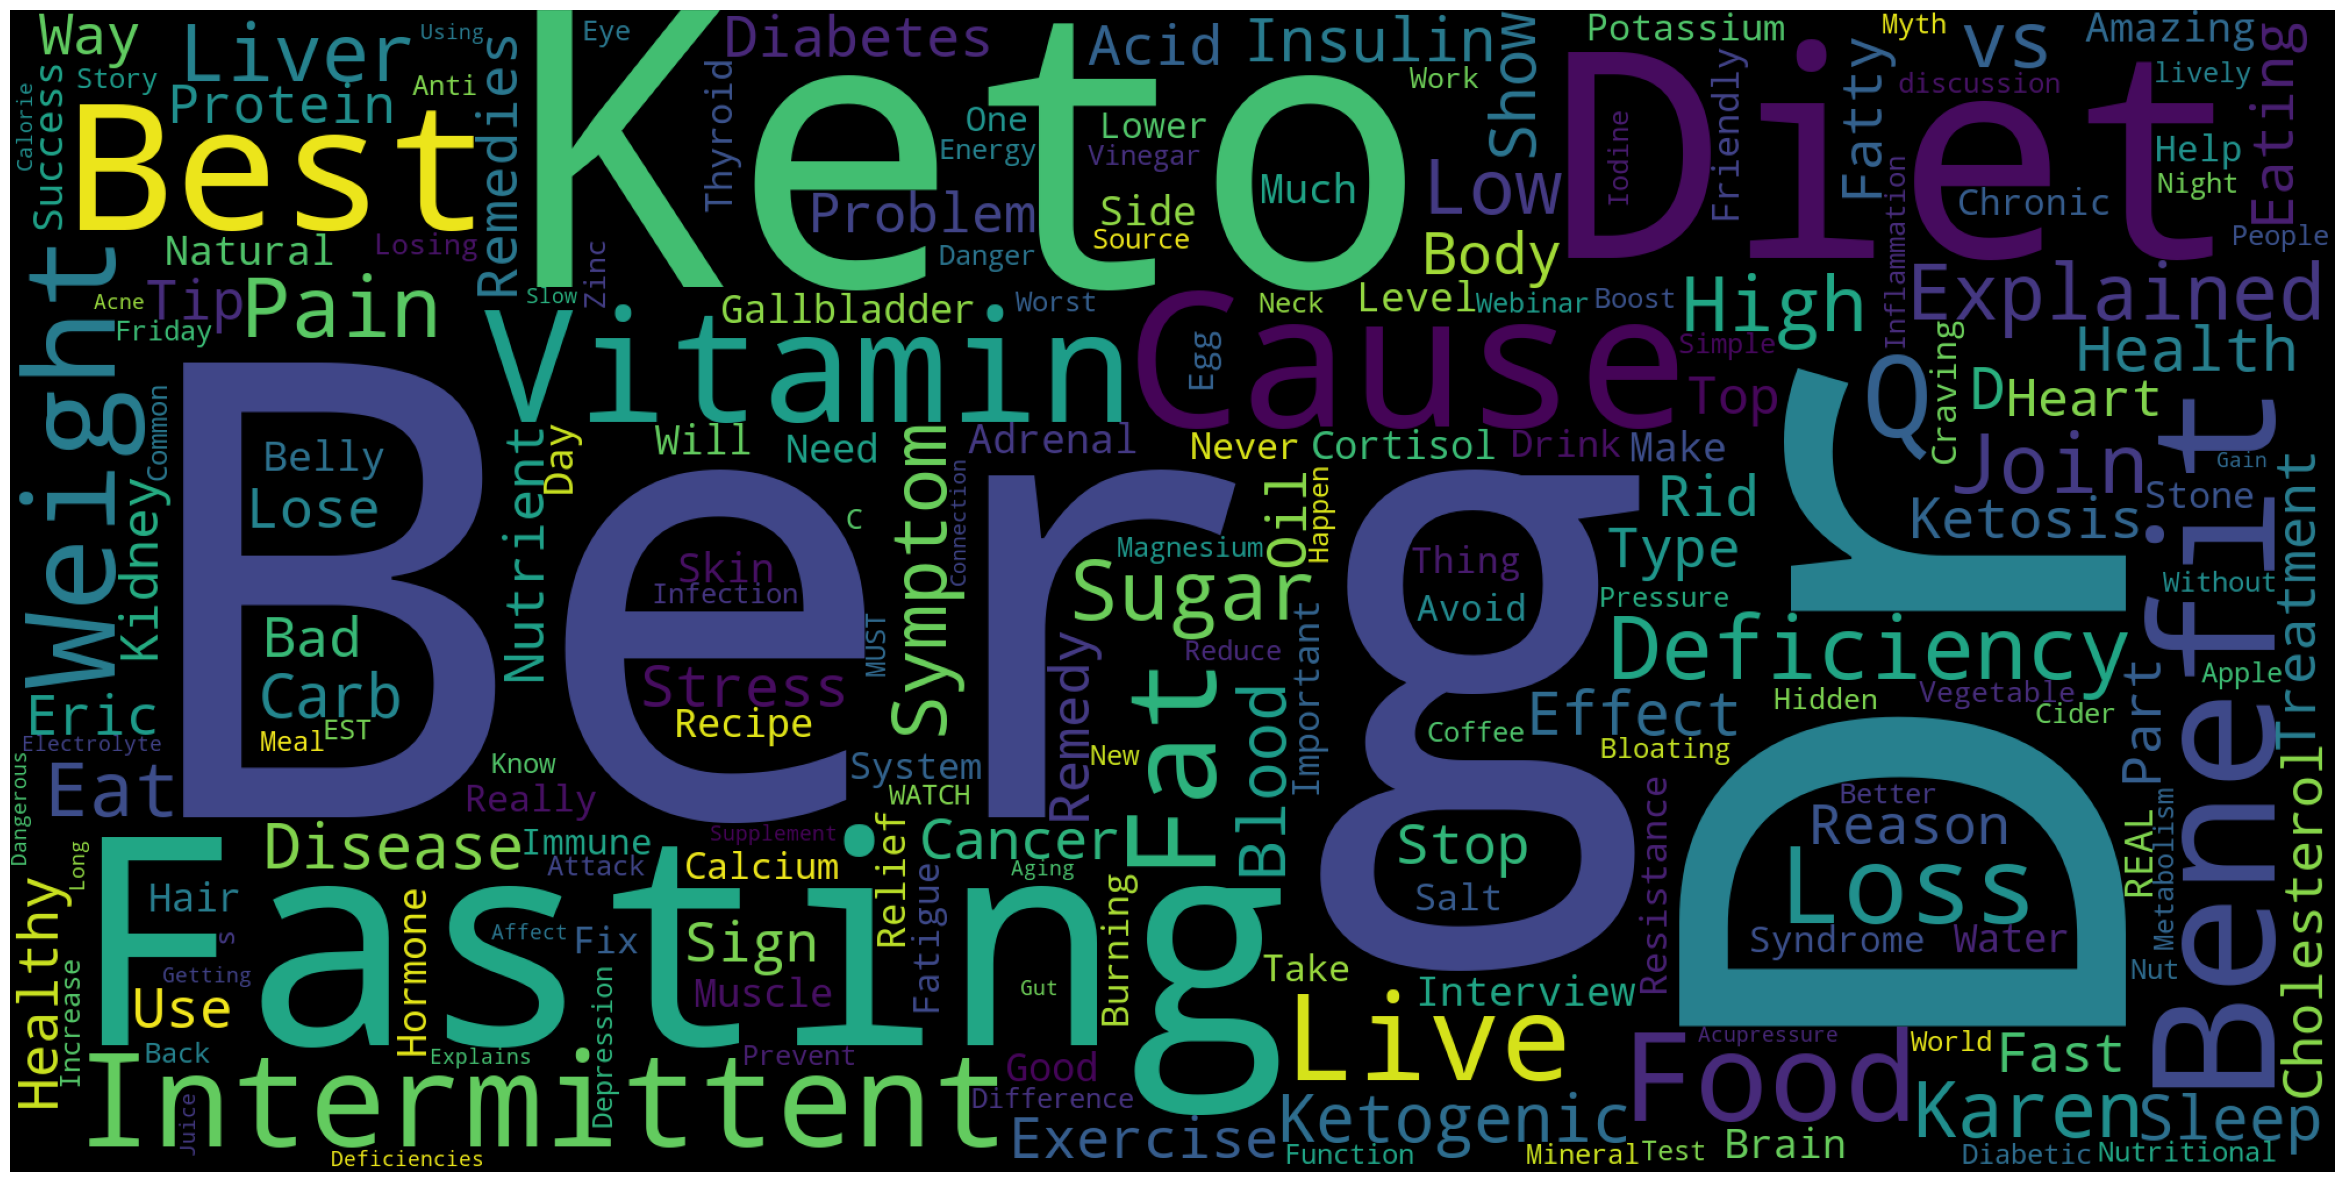

In [ ]:
stop_words = set(stopwords.words('english'))
df['title_no_stopwords'] = df['title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in df['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words) 

def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud) 
    plt.axis("off");

wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black', 
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

# The word occured most often in his videos.

# Upload scedule

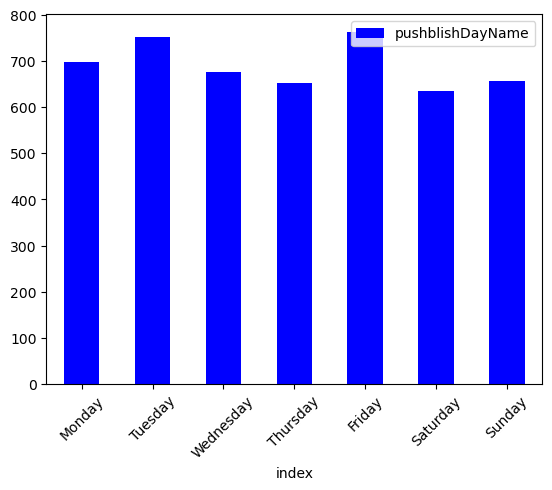

In [ ]:
day_df = pd.DataFrame(df['pushblishDayName'].value_counts())
weekdays = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_df = day_df.reindex(weekdays)
ax = day_df.reset_index().plot.bar(x='index', y='pushblishDayName', color='blue',rot=45)


He uploads his video almost everyday. Tuesday and friday uploads comperatively more than the other days.